In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math
import xgboost as xgb
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

/Users/Faliha/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
cd ..

/Users/Faliha/Dropbox/Faliha Zikra MIS @ SCU/Machine learning/MachineLearning


In [3]:
df_train = pd.read_csv('data/newdf.csv')


In [4]:
df_train['Product_ID'] = df_train['Product_ID'].str[1:]# Drop the first character ‘P’ from product id
df_train = df_train.astype({'Product_ID':int}) # Recast all strings as ints

In [5]:
df_train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df=pd.get_dummies(df_train, columns=['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years'])

In [7]:
X = df.drop(columns=['Purchase_x',])
y = df['Purchase_x']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=42)



### 1. OLS

In [85]:
multivar_model = sm.OLS(y_train,sm.add_constant(X_train)).fit()

In [86]:
multivar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Purchase_x   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     2202.
Date:                Mon, 03 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:22:46   Log-Likelihood:            -3.7879e+06
No. Observations:              385047   AIC:                         7.576e+06
Df Residuals:                  385006   BIC:                         7.576e+06
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -451.7443   1931.442     -0.234      0.815   -4237.312    3333.823
User_ID_x                         0.0111      0.004      2.598      0.009       0.003       0.020
Product_ID                       -0.0022   7.22e-05    -30.933      0.000      -0.002      -0.002
Marital_Status                  -28.9659     15.891     -1.823      0.068     -60.111       2.180
Product_Category_1             -367.0692      1.915   -191.729      0.000    -370.822    -363.317
User_prod_bought                 -0.8783      0.051    -17.112      0.000      -0.979      -0.778
Quantity_sold                     3.9280      0.037    107.578      0.000       3.856       4.000
Popular                        -721.5631     29.858    -24.166      0.000    -780.085    -663.041
Gender_F                       -463.3058    966.049     -0.480      0.632   -2356.733    1430.121
Gender_M                         11.5615    965.474      0.012      0.990   -1880.739    1903.862
Age_0-17                       -383.7642    283.698     -1.353      0.176    -939.804     172.275
Age_18-25                      -377.6446    275.632     -1.370      0.171    -917.874     162.585
Age_26-35                      -170.7165    276.684     -0.617      0.537    -713.009     371.576
Age_36-45                        -5.9867    276.687     -0.022      0.983    -548.285     536.311
Age_46-50                        41.7107    277.602      0.150      0.881    -502.380     585.801
Age_51-55                       289.3149    276.939      1.045      0.296    -253.477     832.107
Age_55+                         155.3421    278.317      0.558      0.577    -390.150     700.834
Occupation_0                    -32.5036     94.985     -0.342      0.732    -218.671     153.664
Occupation_1                   -177.2085     97.311     -1.821      0.069    -367.935      13.518
Occupation_2                    -93.2528     98.891     -0.943      0.346    -287.077     100.571
Occupation_3                    187.6647     99.025      1.895      0.058      -6.422     381.751
Occupation_4                     35.0923     96.248      0.365      0.715    -153.551     223.736
Occupation_5                     13.9285    105.647      0.132      0.895    -193.137     220.994
Occupation_6                     70.2070    100.828      0.696      0.486    -127.413     267.827
Occupation_7                     59.7747     95.728      0.624      0.532    -127.849     247.399
Occupation_8                     -3.3769    156.425     -0.022      0.983    -309.965     303.212
Occupation_9                   -405.5425    112.986     -3.589      0.000    -626.991    -184.094
Occupation_10                  -293.1154    116.158     -2.523      0.012    -520.782     -65.449
Occupation_11                  -146.0444    1

This shows that Marital Status, Number of products user bought, Quantity of item sold were significant features.
Also customers from Occupation 3 ,6,19 seem to be siginficant

**Also Product category seems to be a siginificant feature .**

#### RMSE

In [89]:
#code to calculate RMSE
def rmse(predictor,target):
    return np.sqrt(((predictor - target) ** 2).mean())

In [90]:
predict = multivar_model.predict(sm.add_constant(X_test))
print(rmse(predict,y_test))

4535.362990430912


The RMSE value is very high almost 50 percent of the mean purchase price. Since there isn't a linear relationship between the features and the target , we move to non linear models.

### 2. Random Forest 

In [8]:

rfr= RandomForestRegressor()


In [ ]:
# Randomized Search

max_features = ['auto', 'sqrt',0.2]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 5)]



# Create the random grid


rf_param = {  'n_estimatore':[int(x) for x in np.linspace(10, 1100, num = 50)],
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              
              }

# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using  10 fold cross validation, 

rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = rf_param, random_state=42,cv = 10,n_iter = 100 ,verbose=2,  n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] n_estimatore=98, min_samples_split=5, min_samples_leaf=15, max_features=0.2, max_depth=41 
[CV] n_estimatore=98, min_samples_split=5, min_samples_leaf=15, max_features=0.2, max_depth=41 
[CV] n_estimatore=98, min_samples_split=5, min_samples_leaf=15, max_features=0.2, max_depth=41 
[CV] n_estimatore=98, min_samples_split=5, min_samples_leaf=15, max_features=0.2, max_depth=41 


In [ ]:
#best parameters

rf_random.best_params_

In [9]:
#fitting with new params

rf=RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [11]:
y_pred = rf.predict(X_test)

#### RMSE

In [93]:

#calculating RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

2789.7295325364767

**The RMSE before feature engineering was 2865 , hence feature engineering helped reduce the RMSE**. This means we were off by 2865 dollars for a item of mean purchase price 9500.

#### Feature Importance

Text(0.5,0,'Gini Index')

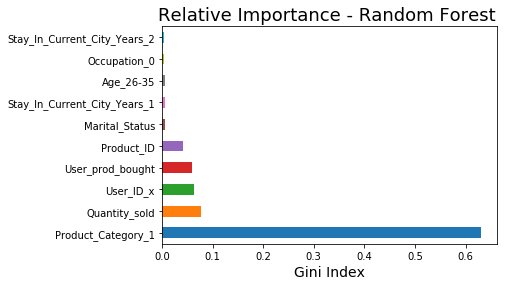

In [94]:
feat_importances = pd.Series(rfr.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Relative Importance - Random Forest ', fontsize=18)
plt.xlabel('Gini Index', fontsize=14)

 **Product Category, Quantiy sold, User ID and Number of items user bought seem to be the most important  features.**
 
 It is possible some product catgories have higher variance in price.
 

The RMSE is definitely lower than RMSE given by the OLS model which was 4382, clearly beacuse there isn't a linear relationship between the the features and and purchase amount. 

### 3. XGB Regressor

In [12]:
# convert data to DMatrix for xgb
dmatrix= xgb.DMatrix(X.values, label=y, missing=np.nan)

In [13]:
untuned_xgb_param = {'objective': 'reg:linear', 'booster': 'gbtree', 'silent': 1,
        'max_depth': 8, 'eta': 0.1, 
        'subsample': 0.8, 'colsample_bytree': 0.8, 'min_child_weight': 10,
        'metrics':'rmse'}

In [14]:
untuned_cv_rmse=xgb.cv(dtrain=dmatrix, params=untuned_xgb_param, nfold=5, seed=123, num_boost_round=690 ,early_stopping_rounds=10)


#### RMSE

In [15]:
untuned_cv_rmse['test-rmse-mean'].mean()

2613.97522016029

In [16]:
# apply untuned hyperparameters to model to fit (better cv results)
xgb_reg=xgb.XGBRegressor(objective='reg:linear', booster='gbtree',
        max_depth= 8, eta= 0.1, 
        subsample=0.8, colsample_bytree=0.8, min_child_weight=10,
        )

In [17]:
xgb_reg.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, eta=0.1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=8, min_child_weight=10, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8)

#### Feature Importance

Text(0.5,1,'Feature Importance Score')

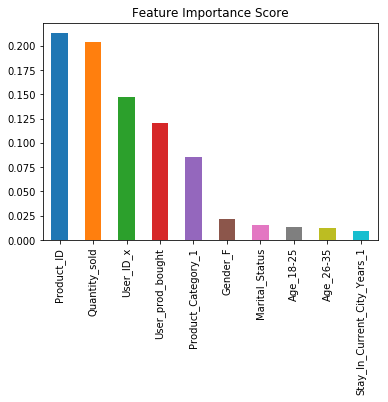

In [19]:
feat_imp = pd.Series(xgb_reg.feature_importances_, index=X.columns).sort_values(ascending=False).nlargest(10)
feat_imp.plot(kind='bar', title='Feature Importances_XGBRegressor')
plt.title('Feature Importance Score')

**This plot shows that the feature engineering features are definitely helping improve the score and are important features.**

### Summary



1. Boosting examples show better results so far 
If we look at the feature importance, we can find the newly added columns: ’Quatity_sold’ & ‘User_prod_bought’ are good features of high importance to both model and we did well in feature engineering, which serves as reverse engineering that we did well in feature engineering
2. How to understand this rmse?
Our target 'Purchase' column has mean value of 9263 and std of 5023, with the maximum value of 24000, 2614 is reasonable RMSE.
3. Possible Reasons:
3.1 144 out of 3631 is 4% of the whole products have stable selling price, while the other 96% of products have price change which will bring high variance to our prediction. However, based on the private dataset we have, it's hard to set up criteria to drop which data points as outliers. Also , we don't have enough information on the discount model of the store, hence we can't for sure know why each item has a varied price point.For future reference, we wish to get more clearity of data and make decision to perform better data cleaning